**Principles and Practice of Remote Sensing**

**Practical:  Feature tracking**


The aims of this practical are:

1.	To introduce concepts and applications related to feature tracking in EO imagery.
2.	To explore various algorithms and parameters related to tracking features in EO imagery.
3.	To produce feature tracking results in test cases.

This practical will be run through a Jupyter notebook: all the files and data you need are already incldued in this file. If you haven't come across notebooks before, you can read more about them here: https://jupyter.org/.

To briefly cover the basics, there are three types of cells:
* Text (like this cell)
* Code (python code, which you will need to run)
* Code outputs (which will appear once you run the code)

First, we need to import some packages which we will use throughout this practical. You will need to run the cell below, but it will not generate any output (it will however load the packages into python).

In [2]:
# <- note, the hashtag indicates that this is a comment, and will not be run as part of the code. Use this to describe
# what you are doing in the code

#Updated to Python/Jupyter by Max Van Wyk de Vries (2021), based on a MATLAB practical prepared by N. Gourmelen; J. Williams (2017), updated by Josh Williams (2018) and Peter Green (2019)

#Import necessary packages
import pandas as pd
import numpy as np
import cv2
import scipy 
import matplotlib.pyplot as plt
import scipy.io as sio
from PIL import Image
import scipy.signal as signal

plt.rcParams['figure.figsize'] = [10, 10] #Set default plot size a little larger

**Section 1: Measures of similarity**

In this exercise, we are going to manually investigate the difference between two signals. We are going to start off doing this in one dimensions in order to understand the underlying method.

We have created two box functions, which are identical except for a certain offset. Your job here is to identify this offset by manually estimating the offset value. 

Start with an offset value of zero, and observe the position of the two curves. Then, continue entering new values (enter 'y' to the next prompt) to improve the fit.

For each offset value you enter, the code will output the *correlation coefficient* between the two curves. For an offset of zero this will be negative (the high values of the red curve coincide with the low values of the red curve, on average). As you improve the fit, this will become positive. For a perfect fit, the correlation coefficient will be 1. 

*Questions*

*Q1: What value of offset is needed here in order to achieve a correlation coefficient of 1?*

*Q2: Why do you think the code fails (produces an error) when you enter a non-integer offset?*

Enter an offset0


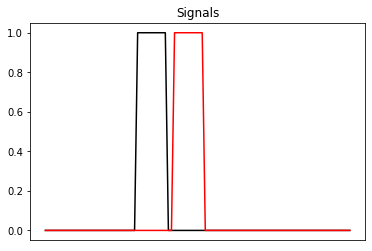

The product of the signals is 0.0
The correlation coefficient between the signals is -0.3846153846153846
Do you want to continue entering additional offsets? y/ny
Enter an offset4


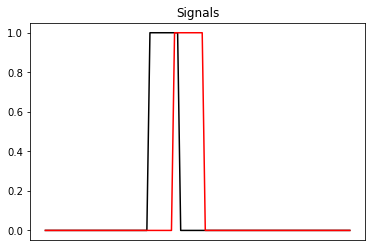

The product of the signals is 2.0
The correlation coefficient between the signals is 0.25773195876288674
Do you want to continue entering additional offsets? y/ny
Enter an offset20


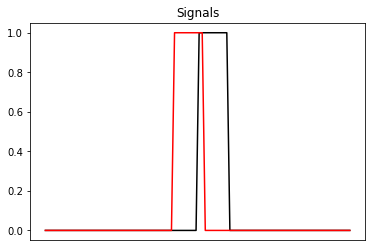

The product of the signals is 2.0
The correlation coefficient between the signals is 0.25773195876288674
Do you want to continue entering additional offsets? y/n12
Enter an offset12


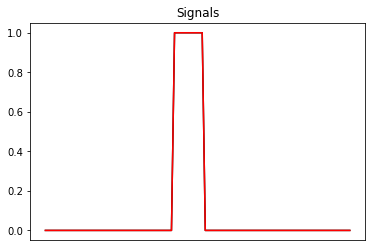

The product of the signals is 10.0
The correlation coefficient between the signals is 1.0
Congratulations, you found the ideal offset!


In [27]:
# You do not need to read this code. Just press run
continue_flag = 'y'

while continue_flag != 'n':
    offset = int(input('Enter an offset'))
    #Create the signals, each 100 units long
    b = np.zeros(100);a = np.zeros(100);a[30+offset:40+offset]=1; b[42:52]=1;
    c=a@b
    d= np.sum((a-np.mean(a))*(b-np.mean(b)))/np.sum(((a-np.mean(a))**2*(b-np.mean(b))**2)**0.5); #np.correlate(a,b)/10
#     plt.subplot(121)
    plt.plot(a,'k');plt.plot(b,'r');ax = plt.gca();ax.axes.xaxis.set_visible(False);plt.title('Signals');plt.show();
    print('The product of the signals is ' +str(c))
    print('The correlation coefficient between the signals is ' +str(d))
    if c!= 10:
        continue_flag = input('Do you want to continue entering additional offsets? y/n')
    else:
        print('Congratulations, you found the ideal offset!')
        continue_flag = 'n'

Real signals do not look like these box functions. The signals we deal with in the geosciences tend to be noisy - a certain amount of noise is inevitably in the data.

Repeat the previous excercise, except this time with some (pure randon) noise introduced into the box functions.

Note, you will need to answer 'n' to the second prompt to end this run.

*Questions*

*Q3: Can you achieve a correlation coefficient of 1?*

*Q4: What value of offset is needed here in order to maximize your correlation coefficient?*

*Q5: Are you as confident about having achived the correct match as the previous example?*

Enter an offset6


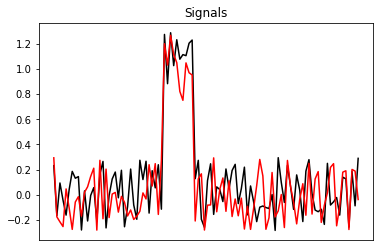

The product of the signals is 11.744141064136361
The correlation coefficient between the signals is 0.870620513932896
Do you want to continue entering additional offsets? y/nn


In [34]:
# You do not need to read this code. Just press run
continue_flag = 'y'

while continue_flag != 'n':
    offset = int(input('Enter an offset'))
    #Create the signals, each 100 units long
    b = -0.3+0.6*np.random.rand(100);a = -0.3+0.6*np.random.rand(100); a[30+offset:40+offset]+=1; b[36:46]+=1;
    c=a@b
    d= np.sum((a-np.mean(a))*(b-np.mean(b)))/np.sum(((a-np.mean(a))**2*(b-np.mean(b))**2)**0.5); #np.correlate(a,b)/10
#     plt.subplot(121)
    plt.plot(a,'k');plt.plot(b,'r');ax = plt.gca();ax.axes.xaxis.set_visible(False);plt.title('Signals');plt.show();
    print('The product of the signals is ' +str(c))
    print('The correlation coefficient between the signals is ' +str(d))
    continue_flag = input('Do you want to continue entering additional offsets? y/n')


Now let's do the same thing one last time, but with an even larger amount of noise.

*Questions*

*Q6: What is the highest correlation coefficient you can achieve? How does it compare to the previous examples?*

*Q7: How confident are you in having found the correct offset? Why?*

Enter an offset0


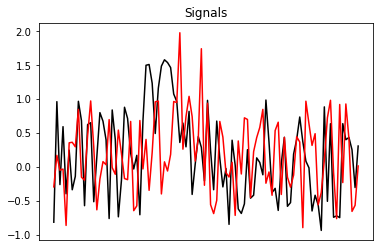

The product of the signals is 7.702963223251615
The correlation coefficient between the signals is 0.17492696913010078
Do you want to continue entering additional offsets? y/ny
Enter an offset9


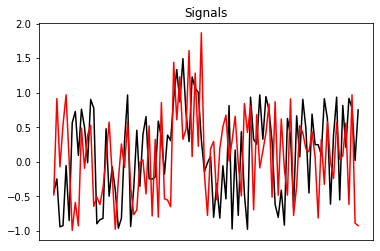

The product of the signals is 7.5837334987129275
The correlation coefficient between the signals is 0.24221825416901988
Do you want to continue entering additional offsets? y/nn


In [39]:
# You do not need to read this code. Just press run
continue_flag = 'y'

while continue_flag != 'n':
    offset = int(input('Enter an offset'))
    #Create the signals, each 100 units long
    b = -1+2*np.random.rand(100);a = -1+2*np.random.rand(100); a[30+offset:40+offset]+=1; b[39:49]+=1;
    c=a@b
    d= np.sum((a-np.mean(a))*(b-np.mean(b)))/np.sum(((a-np.mean(a))**2*(b-np.mean(b))**2)**0.5); #np.correlate(a,b)/10
#     plt.subplot(121)
    plt.plot(a,'k');plt.plot(b,'r');ax = plt.gca();ax.axes.xaxis.set_visible(False);plt.title('Signals');plt.show();
    print('The product of the signals is ' +str(c))
    print('The correlation coefficient between the signals is ' +str(d))
    continue_flag = input('Do you want to continue entering additional offsets? y/n')

Not only is finding the correct match manually rather tedious, it becomes almost impossible for noisy data. This is why we get the computer to do it automatically for us. This automated comparison of two signals is the basis for most feature tracking methods.

In order to examine how this works, let's look back at our 'perfect' box functions using an offset of 10:

Note there is a noise option. Ignore it for now, but you will want to come back an edit it in a little while.

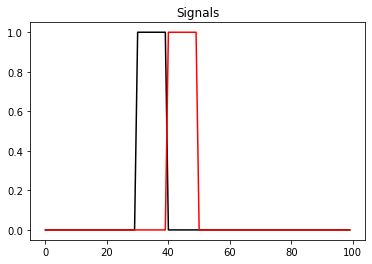

In [85]:
offset = 10
noise = 0

############## Edit the options above this line

if noise == 0:
    b = np.zeros(100);a = np.zeros(100);a[30:40]=1; b[30+offset:40+offset]=1;
else:
    b = -(noise*0.5)+noise*np.random.rand(100);a = -(noise*0.5)+noise*np.random.rand(100);a[30:40]+=1; b[30+offset:40+offset]+=1;    
        
plt.plot(a,'k');plt.plot(b,'r');plt.title('Signals');plt.show();

Now, say we want to identify a small portion of the black curve in the red curve. Let's crop out a portion of this black curve between 20 and 40:

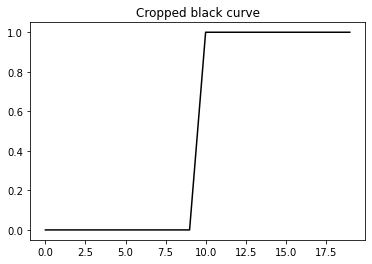

In [86]:
a_crop = a[20:40]
plt.plot(a_crop,'k');plt.title('Cropped black curve');plt.show();

Now, let's calculate the correlation coefficient between this 'cropped out' portion of the black curve and all of the red curve. If everything works out, we should get the highest correlation coefficient when this matches the same portion of the red curve.

*Q8: A warning appears when you run this. Do you have any idea why? (hint: look up the equation for the correlation coefficient, and think about what would happen when one of the series being correlated is all zero)*

C:\Users\gmaxv\AppData\Local\Temp/ipykernel_5952/3366495121.py:3: RuntimeWarning: invalid value encountered in double_scalars
  correlation_coefficient[loop] = np.sum((a_crop-np.mean(a))*(b[loop:loop+20]-np.mean(b[loop:loop+20])))/np.sum(


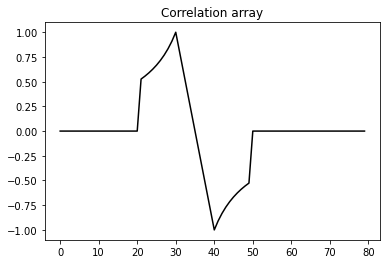

In [87]:
correlation_coefficient = np.zeros(80)
for loop in range(80):
    correlation_coefficient[loop] = np.sum((a_crop-np.mean(a))*(b[loop:loop+20]-np.mean(b[loop:loop+20])))/np.sum(
        ((a_crop-np.mean(a_crop))**2*(b[loop:loop+20]-np.mean(b[loop:loop+20]))**2)**0.5);

correlation_coefficient[np.isnan(correlation_coefficient)] = 0

plt.plot(correlation_coefficient,'k');plt.title('Correlation array');plt.show();

We have now created an array of correlation coefficients. These represent how good the fit between the two cropped out pieces of curve is. This reaches 1 at one point, or a perfect fit! 

We just need one final step now: compare the position of the original cropped-out black curve (20) to the position of maximum correlation coefficient.

In [88]:
position_correlation = np.argmax(correlation_coefficient)
offset_calculated=position_correlation-20;

print('The calculated offset was ' + str(offset_calculated)+ ' pixels, compared to the real offset of ' + str(offset) +' pixels.')
print('The error is ' + str(abs(offset_calculated-offset)) + ' pixel(s).')

The calculated offset was 10 pixels, compared to the real offset of 10 pixels.
The error is 0 pixel(s).


They match - the computer did the same job you did much more efficiently. We can easily upscale this method into two dimensions, comparing the patterns between two images istead of the pattern in a single curve. There are a couple of questions below asking you to explore the effect of noise levels a little more. We will then move onto some real-life examples.

*Q9: Scroll back up the notebook and edit the parameter named 'noise' in the code above. Rerun the code down to this one, and explore the effect of different noise levels.*

*Can the computer correctly estimate the displacement even with some noise in the data?*
*Can the computer correctly estimate the displacement even when the noise level is too high for you to do it by eye?*
*At what noise level is the computer no longer able to identify any patterns?*

Keep these issues of noise in mind when using this method for real world applications.

**2) Tracking movement in videos**


Image pair 1 and 2: optical flow


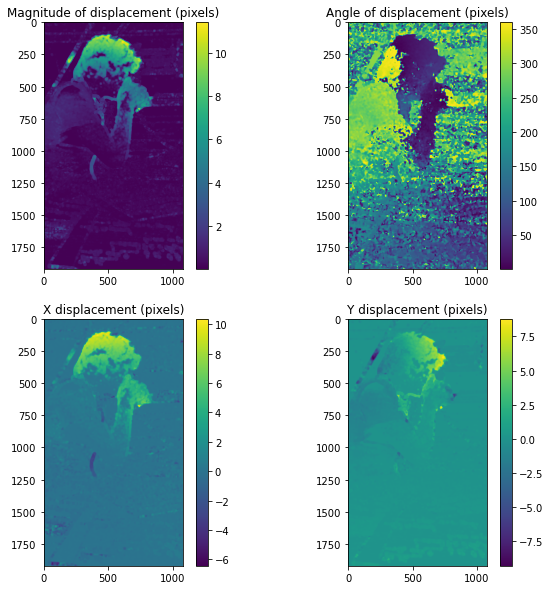

Image pair 1 and 3: optical flow


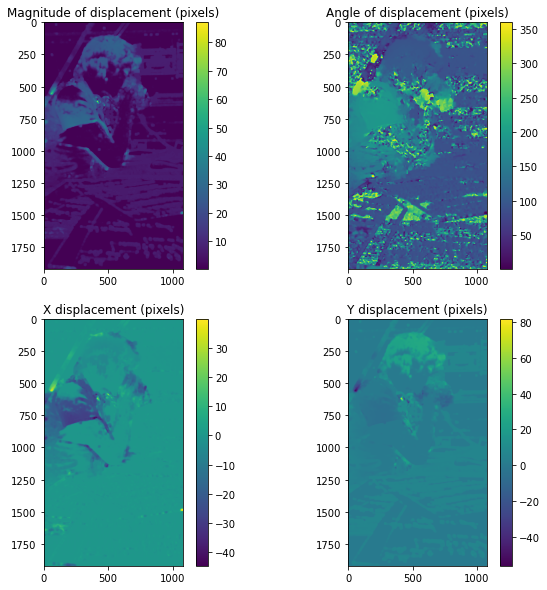

In [8]:
frame_1 = np.array(Image.open('./Ftrack_practical/Video18/image1.png'))
frame_2 = np.array(Image.open('./Ftrack_practical/Video18/image2.png'))
frame_3 = np.array(Image.open('./Ftrack_practical/Video18/image3.png'))



###################First two images
flow = cv2.calcOpticalFlowFarneback(frame_1[:,:,1],frame_2[:,:,1], None, 0.5, 3, 15, 3, 5, 1.2, 0)

hsv = np.zeros_like(frame_1)
hsv[...,1] = 255
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
cv2.imshow('frame2',rgb)
k = cv2.waitKey(30) & 0xff

def pol2cart(rho, phi):
    u = rho * np.cos(phi)
    v = rho * np.sin(phi)
    return(u, v)

print('Image pair 1 and 2: optical flow')

u, v = pol2cart(mag,ang)

plt.subplot(2,2,1)
plt.imshow(mag);plt.title('Magnitude of displacement (pixels)');plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(ang*180/3.1415);plt.title('Angle of displacement (pixels)');plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(u);plt.title('X displacement (pixels)');plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(v);plt.title('Y displacement (pixels)');plt.colorbar();plt.show();

################First and third images
flow = cv2.calcOpticalFlowFarneback(frame_1[:,:,1],frame_3[:,:,1], None, 0.5, 3, 15, 3, 5, 1.2, 0)

hsv = np.zeros_like(frame_1)
hsv[...,1] = 255
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
cv2.imshow('frame2',rgb)
k = cv2.waitKey(30) & 0xff

def pol2cart(rho, phi):
    u = rho * np.cos(phi)
    v = rho * np.sin(phi)
    return(u, v)

print('Image pair 1 and 3: optical flow')

u, v = pol2cart(mag,ang)

plt.subplot(2,2,1)
plt.imshow(mag);plt.title('Magnitude of displacement (pixels)');plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(ang*180/3.1415);plt.title('Angle of displacement (pixels)');plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(u);plt.title('X displacement (pixels)');plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(v);plt.title('Y displacement (pixels)');plt.colorbar();plt.show();



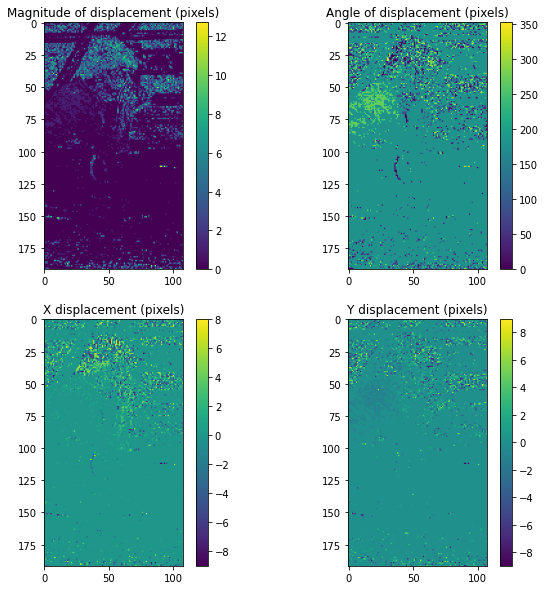

In [9]:
#Crude PIV algorithm for tests
def piv(img1, img2, siw=20, ssw=None):
    if ssw is None:
        ssw = siw
    sim1 = np.shape(img1);x = np.arange(ssw//2, sim1[1], siw); y = np.arange(ssw//2, sim1[0], siw);X, Y = np.meshgrid(x, y)
    u = np.zeros((len(y), len(x)));v = np.zeros((len(y), len(x))); 
    border_diffy = sim1[0] - y[-1]; border_diffx = sim1[1] - x[-1]
    if border_diffy < ssw//2 and border_diffy != 0:
        img1 = np.pad(img1, ((0, 0),(0, ssw//2 - border_diffy)))
    if border_diffx < ssw//2 and border_diffx != 0:
        img1 = np.pad(img1, ((0, ssw//2 - border_diffx),(0, 0)))   
    for n,i in enumerate(x):
        for m,j in enumerate(y):
            interr_window = np.array(img1[j-siw//2:j+siw//2, i-siw//2:i+siw//2])
            search_window = np.array(img2[j-ssw//2:j+ssw//2, i-ssw//2:i+ssw//2])
            interr_window = interr_window - np.mean(interr_window);search_window = search_window - np.mean(search_window)
            corr = signal.correlate2d(search_window, interr_window, mode='full')
            ind = np.unravel_index(corr.argmax(), corr.shape)
            u[m, n] = ind[1] - ((ssw + siw)//2-1); v[m, n] = ind[0] - ((ssw + siw)//2-1)
    return X,Y,u,v


X,Y,u,v = piv(frame_1[:,:,1],frame_2[:,:,1], siw=10, ssw=None)

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)
mag, ang = cart2pol(u, v)

plt.subplot(2,2,1)
plt.imshow(mag);plt.title('Magnitude of displacement (pixels)');plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(180-ang*180/3.1415);plt.title('Angle of displacement (pixels)');plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(u);plt.title('X displacement (pixels)');plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(v);plt.title('Y displacement (pixels)');plt.colorbar();plt.show();

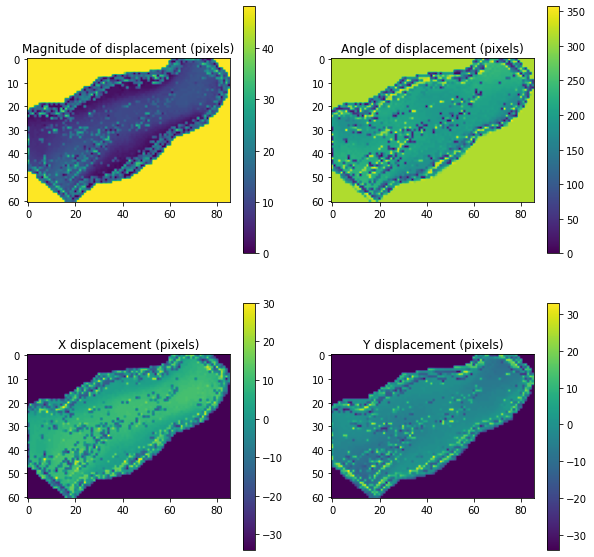

In [23]:
#Test with Perito Moreno images
am1 = np.array(Image.open('./Ftrack_practical/20200101.jpg'))
am2 = np.array(Image.open('./Ftrack_practical/20200210.jpg'))

X,Y,u,v = piv(am1[:,:,1],am2[:,:,1], siw=20, ssw=30)

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)
mag, ang = cart2pol(u, v)

plt.subplot(2,2,1)
plt.imshow(mag);plt.title('Magnitude of displacement (pixels)');plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(180-ang*180/3.1415);plt.title('Angle of displacement (pixels)');plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(u);plt.title('X displacement (pixels)');plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(v);plt.title('Y displacement (pixels)');plt.colorbar();plt.show();

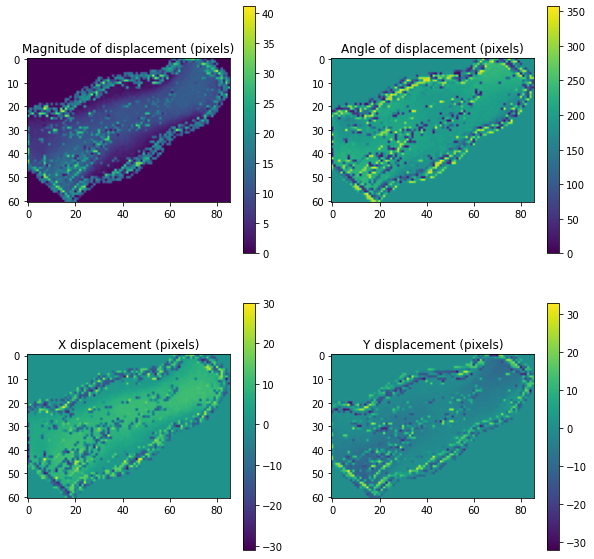

In [40]:

u[u==np.min(u)]=0
v[v==np.min(v)]=0

mag, ang = cart2pol(u, v)



plt.subplot(2,2,1)
plt.imshow(mag);plt.title('Magnitude of displacement (pixels)');plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(180-ang*180/3.1415);plt.title('Angle of displacement (pixels)');plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(u);plt.title('X displacement (pixels)');plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(v);plt.title('Y displacement (pixels)');plt.colorbar();plt.show();